<a href="https://colab.research.google.com/github/dawidmakowski-git/ai_projects/blob/master/Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## **Import Fashion MNIST dataset**

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

## **Preprocess the data**

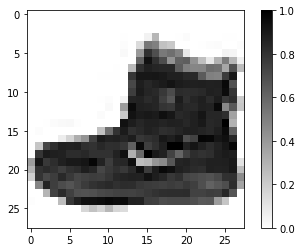

In [22]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# Scale values to range of 0 to 1 before handling to the model

train_images = train_images / 255.0
test_images = test_images  / 255.0

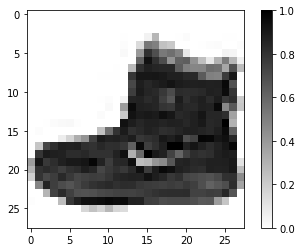

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

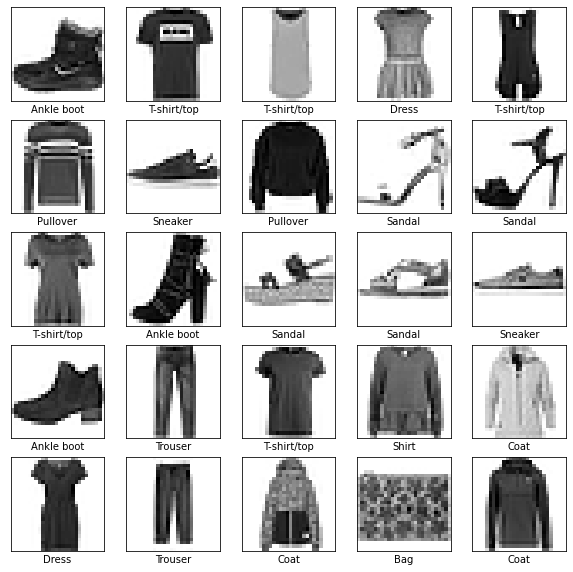

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Build the model**

In [28]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the modele

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3130 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2690 - accuracy: 0.8988
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3260 - accuracy: 0.8842

Test accuracy:  0.8841999769210815


In [32]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [41]:
predictions = probability_model.predict(test_images)

In [42]:
predictions[0]

array([1.9764739e-05, 2.3773803e-09, 1.3966066e-07, 9.6634568e-11,
       6.9130603e-09, 5.8648968e-03, 4.0614932e-06, 3.1749567e-03,
       9.0311447e-10, 9.9093622e-01], dtype=float32)

In [43]:
np.argmax(predisctions[0])

9

In [44]:
test_labels[0]

9

In [45]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [48]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

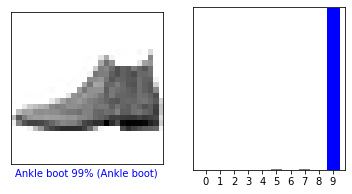

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

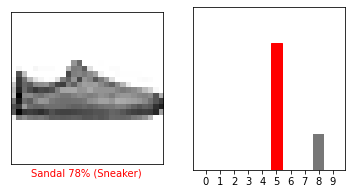

In [50]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

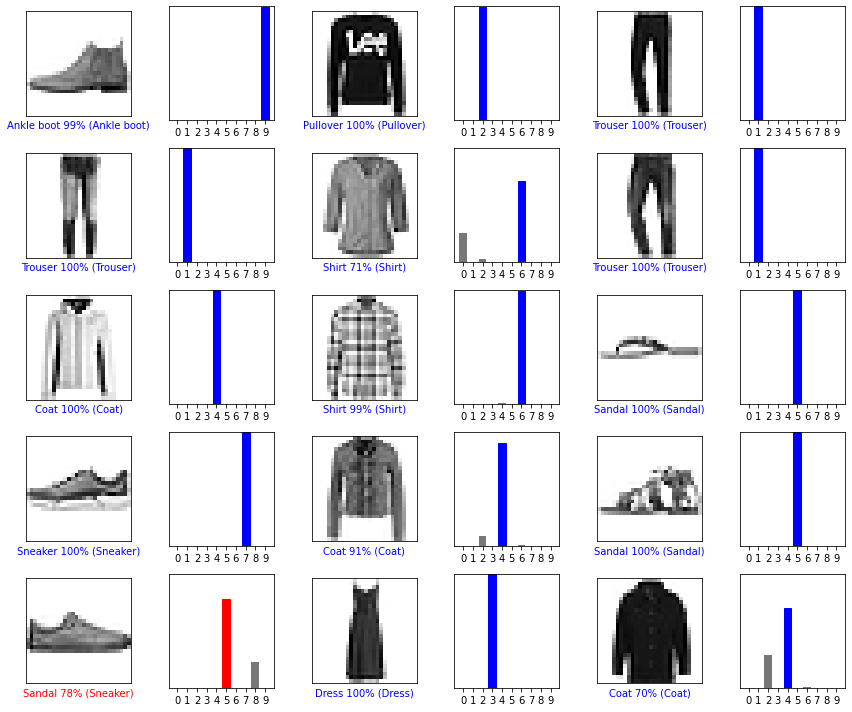

In [51]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## **Use the trained model**

In [52]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [53]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [54]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.3968678e-05 2.0848138e-16 9.9890172e-01 2.6602262e-10 1.0159154e-03
  1.2848490e-14 4.8375459e-05 1.3914983e-19 1.8644261e-11 2.0560159e-18]]


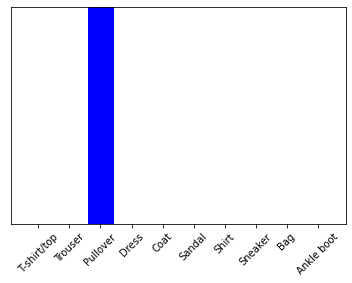

In [55]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [56]:
np.argmax(predictions_single[0])

2

In [57]:
class_names[np.argmax(predictions_single[0])]

'Pullover'